In [1]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/'
zDfil='lowgeopot.dat'
uDfil='lowuwind.dat'
vDfil='lowvwind.dat'
topo_file = "lowtopo.dat"

In [3]:
ntime=3
nx=13
ny=5
recl=(nx*ny)*4
z_bin=np.zeros((ntime,nx,ny))
u_bin=np.zeros((ntime,nx,ny))
v_bin=np.zeros((ntime,nx,ny))
topo_bin=np.zeros((ny,nx))

In [4]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [5]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_z_bin,tmp,tmp1

In [6]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_u_bin,tmp,tmp1

In [7]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_v_bin,tmp,tmp1

In [8]:
# calculate time mean
z_bin_mean = z_bin.mean(axis=0)
u_bin_mean = u_bin.mean(axis=0)
v_bin_mean = v_bin.mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

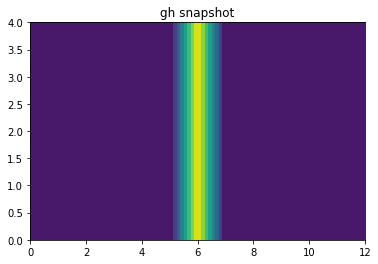

In [9]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

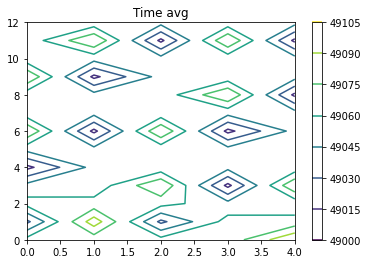

In [10]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('Time avg')

cbar = fig.colorbar(zc, ax=ax)
plt.show()

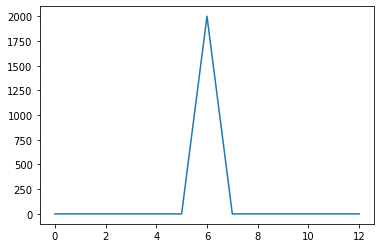

In [11]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

Text(0.5, 1.0, 'gh snapshot')

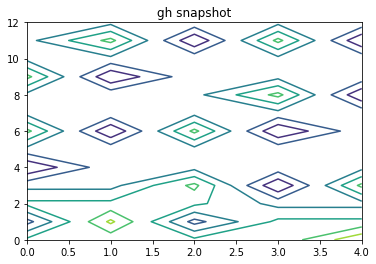

In [12]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[-1,:,:])
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh time mean')

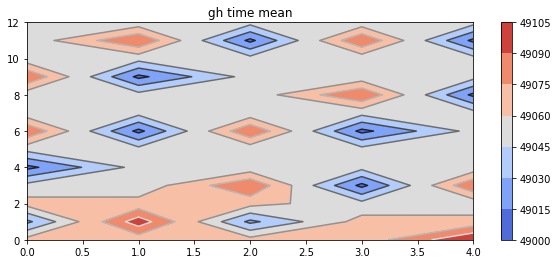

In [13]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

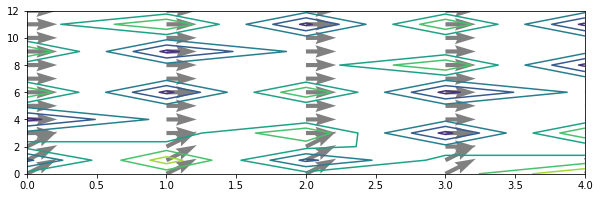

In [14]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean)
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nx)
y=np.arange(ny)
zc = ax.quiver(u_bin_mean, v_bin_mean,color='grey')


In [15]:
u_bin_mean[:,:]

array([[19.92680677, 19.92569033, 19.92622948, 19.92622757, 19.92600632],
       [19.92696762, 19.92574183, 19.92549133, 19.92693837, 19.92623011],
       [19.92622884, 19.92622884, 19.92788188, 19.92054494, 19.92054494],
       [19.92054431, 19.92054431, 19.92054494, 19.92056529, 19.92052396],
       [19.92052396, 19.92056529, 19.92054494, 19.92054431, 19.92054431],
       [19.92054494, 19.92054494, 19.92054494, 19.92054431, 19.92054431],
       [19.92054494, 19.92056529, 19.92052396, 19.92052396, 19.92056529],
       [19.92054494, 19.92054431, 19.92054431, 19.92054494, 19.92046165],
       [19.92046165, 19.92046102, 19.92046102, 19.92046102, 19.92047691],
       [19.92044576, 19.92044576, 19.92047691, 19.92046102, 19.92046102],
       [19.92046102, 19.92046165, 19.92025312, 19.9202474 , 19.92025503],
       [19.92024994, 19.91914876, 19.92094612, 19.92080053, 19.91956202],
       [19.92080752, 19.92025375, 19.92025312, 19.92025312, 19.9202582 ]])

In [16]:
v_bin_mean[:,:]

array([[9.91161366, 9.91493944, 9.91493181, 9.91494707, 9.92121207],
       [9.91188768, 9.91300538, 9.91183809, 9.91493944, 9.91493944],
       [9.91493944, 9.91493944, 9.91162446, 0.02553283, 0.0286097 ],
       [0.02859574, 0.02862424, 0.03558478, 0.02734999, 0.01989248],
       [0.02811144, 0.02861029, 0.0286097 , 0.0286097 , 0.0286097 ],
       [0.02498015, 0.03353361, 0.03360001, 0.03358673, 0.03361329],
       [0.04023868, 0.03277   , 0.02531661, 0.03275805, 0.0336    ],
       [0.03360001, 0.03360001, 0.03360001, 0.03353361, 0.03356618],
       [0.03363256, 0.03361928, 0.03364584, 0.04027123, 0.03279908],
       [0.0253364 , 0.03279407, 0.03363255, 0.03363256, 0.03363256],
       [0.03363256, 0.03356613, 0.05015018, 0.05019992, 0.05018997],
       [0.05020989, 0.05517881, 0.04963909, 0.04398737, 0.0495066 ],
       [0.05019993, 0.05019992, 0.05019992, 0.05019992, 0.05015006]])